In [1]:
import pandas as pd
import numpy as np
# import shap
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update path

# Define Features and Target
X = df[["pm2_5 (μg/m³)_subindex","pm10 (μg/m³)_subindex","carbon_monoxide (μg/m³)_subindex","ozone (μg/m³)_subindex","sulphur_dioxide (μg/m³)_subindex","nitrogen_dioxide (μg/m³)_subindex"]]
y = df["AQI"]

# Split dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=10, random_state=12)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae:.2f}")
print(f" MSE: {mse:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.4f}")

Model Performance:
MAE: 0.36
 MSE: 5.60
 RMSE: 2.37
 R² Score: 0.9962


In [2]:
# Ensure that we only use the features that were used in training
trained_features = rf_model.feature_names_in_

# Create DataFrame with correct feature names
importance_df = pd.DataFrame({
    'Feature': trained_features,  
    'Importance': rf_model.feature_importances_
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print values
print(importance_df)


                             Feature  Importance
0             pm2_5 (μg/m³)_subindex    0.599863
3             ozone (μg/m³)_subindex    0.347388
1              pm10 (μg/m³)_subindex    0.051224
2   carbon_monoxide (μg/m³)_subindex    0.000814
4   sulphur_dioxide (μg/m³)_subindex    0.000390
5  nitrogen_dioxide (μg/m³)_subindex    0.000321


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score

# ✅ Random Forest Accuracy Metrics
y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print(f"📌 Random Forest Performance:")
print(f"   - MAE: {mae_rf:.2f}")
print(f"   - MSE: {mse_rf:.2f}")
print(f"   - RMSE: {rmse_rf:.2f}")
print(f"   - R² Score: {r2_rf:.4f}")



📌 Random Forest Performance:
   - MAE: 0.36
   - MSE: 5.60
   - RMSE: 2.37
   - R² Score: 0.9962


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

# Load Data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")

# Define Features (Use Raw Pollutant Concentrations)
X = df[["pm2_5 (μg/m³)", "pm10 (μg/m³)", 
        "carbon_monoxide (μg/m³)", "ozone (μg/m³)", 
        "sulphur_dioxide (μg/m³)", "nitrogen_dioxide (μg/m³)"]]

# 📌 Classification Task: AQI Category Prediction
df["AQI_Category"] = pd.cut(df["AQI"], bins=[0, 100, 200, 300, 400, 500], 
                            labels=["Good", "Moderate", "Poor", "Very Poor", "Severe"])

# Encode Labels for Classification
le = LabelEncoder()
df["AQI_Label"] = le.fit_transform(df["AQI_Category"])  
y_class = df["AQI_Label"]  # Classification target

# 📌 Regression Task: Raw AQI Prediction
y_reg = df["AQI"]  # Regression target

# Split Data (30% test, 70% train)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=12, stratify=y_class)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=12)

# ------------------ CLASSIFICATION: Predict AQI Category ------------------ #
clf = RandomForestClassifier(
    n_estimators=30,        # Lower trees for small dataset
    max_depth=6,            # Balanced depth
    min_samples_split=15,   # Prevents small splits
    min_samples_leaf=10,    # Ensures each leaf has enough samples
    max_features="sqrt",    # Random feature selection
    bootstrap=True,         # Prevents overfitting
    random_state=42
)
clf.fit(X_train, y_train_class)

# Predictions
y_pred_class = clf.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print("📌 Classification Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

# ------------------ REGRESSION: Predict Raw AQI ------------------ #
reg = RandomForestRegressor(
    n_estimators=30,        
    max_depth=6,           
    min_samples_split=15,  
    min_samples_leaf=10,    
    max_features="sqrt",    
    bootstrap=True,        
    random_state=42
)
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

# Evaluate Performance
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\n📌 Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📌 Classification Accuracy: 0.9962292609351433
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1975
           1       0.98      1.00      0.99       608
           2       1.00      0.92      0.96        50
           3       1.00      0.89      0.94        19

    accuracy                           1.00      2652
   macro avg       1.00      0.95      0.97      2652
weighted avg       1.00      1.00      1.00      2652

Confusion Matrix:
 [[1971    4    0    0]
 [   0  608    0    0]
 [   0    4   46    0]
 [   0    2    0   17]]

📌 Regression Model Performance:
MAE: 3.83
MSE: 43.73
RMSE: 6.61
R² Score: 0.9707


Cluster Data Point Distribution:
 Cluster
0    884
1    884
Name: count, dtype: int64


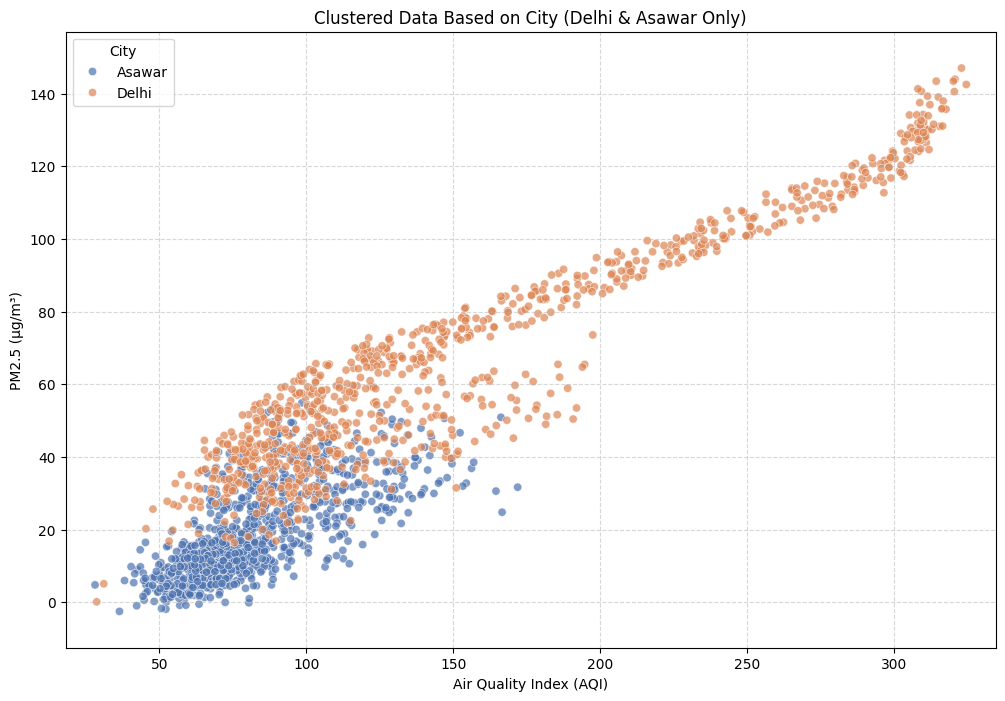

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update with correct path

# Selecting relevant features for clustering
features = ["pm10 (μg/m³)", "pm2_5 (μg/m³)", "carbon_monoxide (μg/m³)",
            "nitrogen_dioxide (μg/m³)", "sulphur_dioxide (μg/m³)", "ozone (μg/m³)"]

# Drop rows with missing values
df = df.dropna(subset=features + ["Location"])

# **Filter to keep only Delhi and Mawlynnong**
df = df[df["Location"].isin(["Delhi", "Asawar"])]

# **Manually assign clusters based on city**
city_to_cluster = {"Delhi": 0, "Asawar": 1}
df["Cluster"] = df["Location"].map(city_to_cluster)

# **Check the count of points per cluster**
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Data Point Distribution:\n", cluster_counts)

# **Add jitter to avoid overlapping points**
jitter_strength = 5  # Adjust this value to control spread
df["AQI_jitter"] = df["AQI"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
df["pm2_5_jitter"] = df["pm2_5 (μg/m³)"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

# **Plot Clusters**
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="AQI_jitter", y="pm2_5_jitter", hue=df["Location"], palette="deep", alpha=0.7)

# **Adjust Axis Limits for a More Spread-Out View**
plt.xlim(df["AQI_jitter"].min() - 10, df["AQI_jitter"].max() + 10)
plt.ylim(df["pm2_5_jitter"].min() - 10, df["pm2_5_jitter"].max() + 10)

plt.title("Clustered Data Based on City (Delhi & Asawar Only)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("PM2.5 (μg/m³)")
plt.legend(title="City")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()


Cluster Data Point Distribution:
 Cluster
0    884
1    884
Name: count, dtype: int64


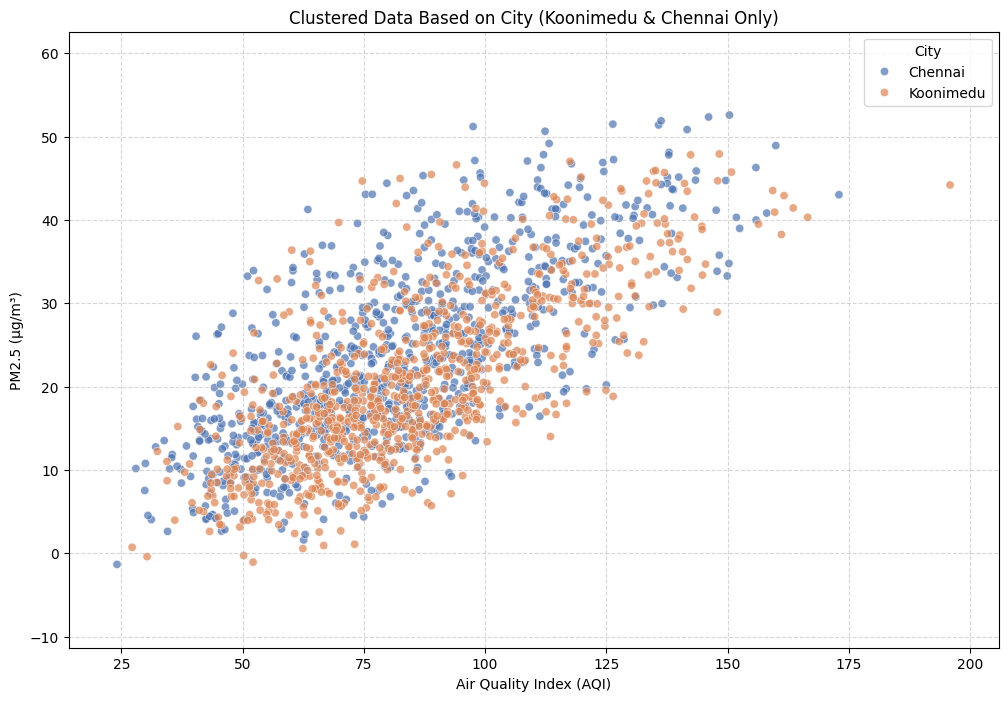

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update with correct path

# Selecting relevant features for clustering
features = ["pm10 (μg/m³)", "pm2_5 (μg/m³)", "carbon_monoxide (μg/m³)",
            "nitrogen_dioxide (μg/m³)", "sulphur_dioxide (μg/m³)", "ozone (μg/m³)"]

# Drop rows with missing values
df = df.dropna(subset=features + ["Location"])

# **Filter to keep only Koonimedu and Chennai**
df = df[df["Location"].isin(["Koonimedu", "Chennai"])]

# **Manually assign clusters based on city**
city_to_cluster = {"Koonimedu": 0, "Chennai": 1}
df["Cluster"] = df["Location"].map(city_to_cluster)

# **Check the count of points per cluster**
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Data Point Distribution:\n", cluster_counts)

# **Add jitter to avoid overlapping points**
jitter_strength = 5  # Adjust this value to control spread
df["AQI_jitter"] = df["AQI"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
df["pm2_5_jitter"] = df["pm2_5 (μg/m³)"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

# **Plot Clusters**
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="AQI_jitter", y="pm2_5_jitter", hue=df["Location"], palette="deep", alpha=0.7)

# **Adjust Axis Limits for a More Spread-Out View**
plt.xlim(df["AQI_jitter"].min() - 10, df["AQI_jitter"].max() + 10)
plt.ylim(df["pm2_5_jitter"].min() - 10, df["pm2_5_jitter"].max() + 10)

plt.title("Clustered Data Based on City (Koonimedu & Chennai Only)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("PM2.5 (μg/m³)")
plt.legend(title="City")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()


Cluster Data Point Distribution:
 Cluster
0    884
1    884
Name: count, dtype: int64


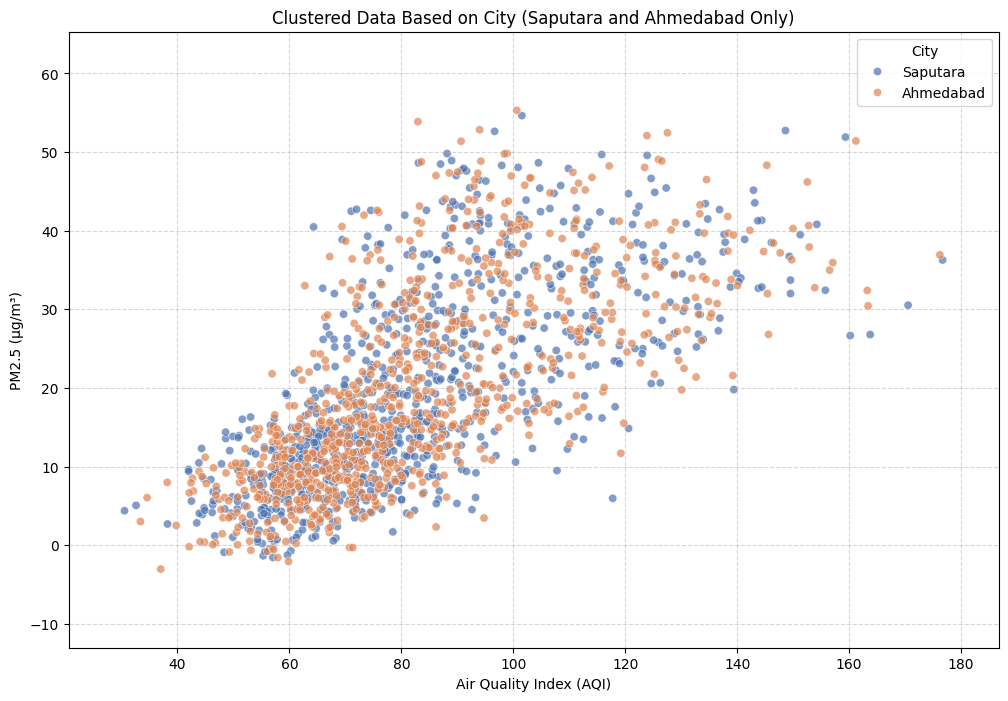

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update with correct path

# Selecting relevant features for clustering
features = ["pm10 (μg/m³)", "pm2_5 (μg/m³)", "carbon_monoxide (μg/m³)",
            "nitrogen_dioxide (μg/m³)", "sulphur_dioxide (μg/m³)", "ozone (μg/m³)"]

# Drop rows with missing values
df = df.dropna(subset=features + ["Location"])

# **Filter to keep only Koonimedu and Chennai**
df = df[df["Location"].isin(["Ahmedabad", "Saputara"])]

# **Manually assign clusters based on city**
city_to_cluster = {"Saputara": 0, "Ahmedabad": 1}
df["Cluster"] = df["Location"].map(city_to_cluster)

# **Check the count of points per cluster**
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Data Point Distribution:\n", cluster_counts)

# **Add jitter to avoid overlapping points**
jitter_strength = 5  # Adjust this value to control spread
df["AQI_jitter"] = df["AQI"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
df["pm2_5_jitter"] = df["pm2_5 (μg/m³)"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

# **Plot Clusters**
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="AQI_jitter", y="pm2_5_jitter", hue=df["Location"], palette="deep", alpha=0.7)

# **Adjust Axis Limits for a More Spread-Out View**
plt.xlim(df["AQI_jitter"].min() - 10, df["AQI_jitter"].max() + 10)
plt.ylim(df["pm2_5_jitter"].min() - 10, df["pm2_5_jitter"].max() + 10)

plt.title("Clustered Data Based on City (Saputara and Ahmedabad Only)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("PM2.5 (μg/m³)")
plt.legend(title="City")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()


Cluster Data Point Distribution:
 Cluster
0    884
1    884
Name: count, dtype: int64


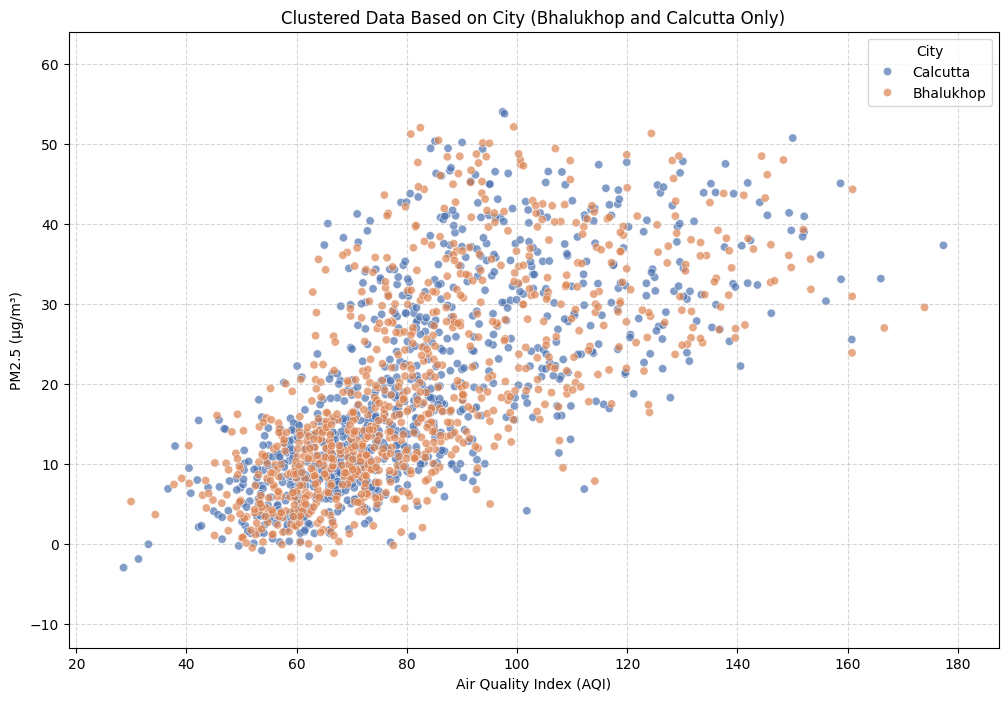

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update with correct path

# Selecting relevant features for clustering
features = ["pm10 (μg/m³)", "pm2_5 (μg/m³)", "carbon_monoxide (μg/m³)",
            "nitrogen_dioxide (μg/m³)", "sulphur_dioxide (μg/m³)", "ozone (μg/m³)"]

# Drop rows with missing values
df = df.dropna(subset=features + ["Location"])

# **Filter to keep only Koonimedu and Chennai**
df = df[df["Location"].isin(["Calcutta", "Bhalukhop"])]

# **Manually assign clusters based on city**
city_to_cluster = {"Bhalukhop": 0, "Calcutta": 1}
df["Cluster"] = df["Location"].map(city_to_cluster)

# **Check the count of points per cluster**
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Data Point Distribution:\n", cluster_counts)

# **Add jitter to avoid overlapping points**
jitter_strength = 5  # Adjust this value to control spread
df["AQI_jitter"] = df["AQI"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
df["pm2_5_jitter"] = df["pm2_5 (μg/m³)"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

# **Plot Clusters**
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="AQI_jitter", y="pm2_5_jitter", hue=df["Location"], palette="deep", alpha=0.7)

# **Adjust Axis Limits for a More Spread-Out View**
plt.xlim(df["AQI_jitter"].min() - 10, df["AQI_jitter"].max() + 10)
plt.ylim(df["pm2_5_jitter"].min() - 10, df["pm2_5_jitter"].max() + 10)

plt.title("Clustered Data Based on City (Bhalukhop and Calcutta Only)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("PM2.5 (μg/m³)")
plt.legend(title="City")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()


Cluster Data Point Distribution:
 Cluster
0    884
1    884
Name: count, dtype: int64


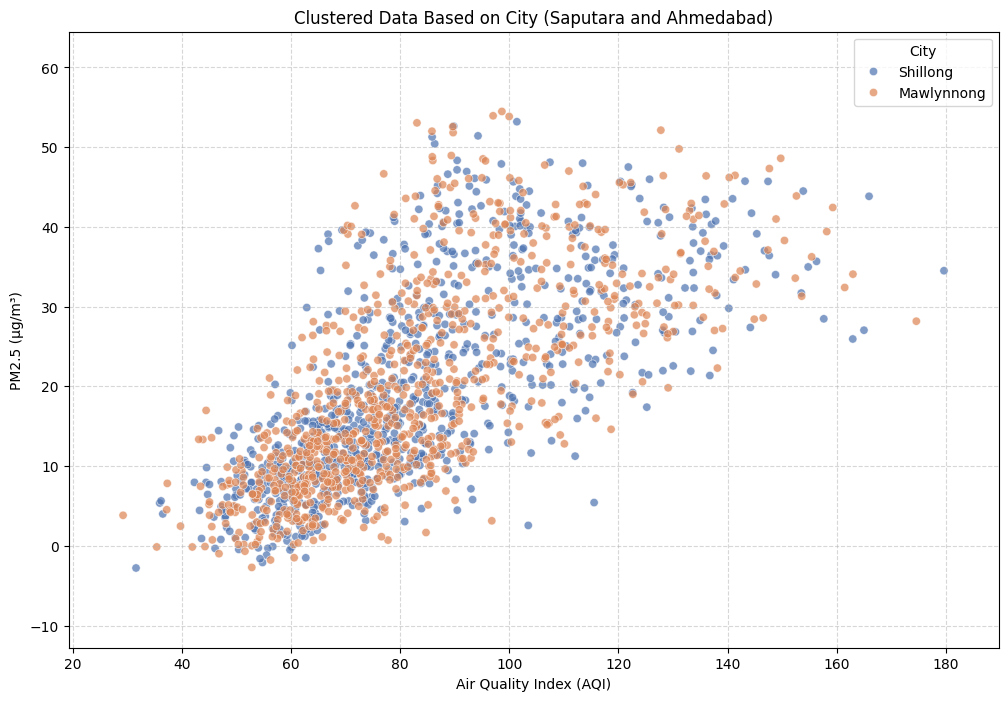

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("..//data/featureddata/featured_daily.csv")  # Update with correct path

# Selecting relevant features for clustering
features = ["pm10 (μg/m³)", "pm2_5 (μg/m³)", "carbon_monoxide (μg/m³)",
            "nitrogen_dioxide (μg/m³)", "sulphur_dioxide (μg/m³)", "ozone (μg/m³)"]

# Drop rows with missing values
df = df.dropna(subset=features + ["Location"])

# **Filter to keep only Koonimedu and Chennai**
df = df[df["Location"].isin(["Shillong", "Mawlynnong"])]

# **Manually assign clusters based on city**
city_to_cluster = {"Shillong": 0, "Mawlynnong": 1}
df["Cluster"] = df["Location"].map(city_to_cluster)

# **Check the count of points per cluster**
cluster_counts = df["Cluster"].value_counts().sort_index()
print("Cluster Data Point Distribution:\n", cluster_counts)

# **Add jitter to avoid overlapping points**
jitter_strength = 5  # Adjust this value to control spread
df["AQI_jitter"] = df["AQI"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
df["pm2_5_jitter"] = df["pm2_5 (μg/m³)"] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

# **Plot Clusters**
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="AQI_jitter", y="pm2_5_jitter", hue=df["Location"], palette="deep", alpha=0.7)

# **Adjust Axis Limits for a More Spread-Out View**
plt.xlim(df["AQI_jitter"].min() - 10, df["AQI_jitter"].max() + 10)
plt.ylim(df["pm2_5_jitter"].min() - 10, df["pm2_5_jitter"].max() + 10)

plt.title("Clustered Data Based on City (Saputara and Ahmedabad)")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("PM2.5 (μg/m³)")
plt.legend(title="City")
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()
